In [1]:
from importlib import reload
import pandas as pd

In [2]:
import numpy as np
import spacy
from wordcloud import WordCloud


import matplotlib.pyplot as plt

In [3]:
import nltk
#nltk.download('stopwords')

In [4]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer


In [5]:
import nlp_pandas_functions as npf
#dir(npf)

2022-01-24 18:51:37,143 loading file /home/cdsw/.flair/models/sentiment-en-mix-distillbert_4.pt


In [6]:
#pip3 install pyarrow
#pip3 install spacy
#pip3 install wordcloud
#pip3 install nltk
#pip3 install sklearn
#pip3 install ipdb

In [7]:
from nlp_pandas_functions import ngram_analysis
reload(ngram_analysis)
dir(ngram_analysis)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'bigrams_join',
 'count_n_grams',
 'defaultdict',
 'df_get_n_grams_count',
 'df_lambda_ngram',
 'generate_n_grams',
 'get_imp',
 'get_n_grams_count',
 'get_n_grams_probability',
 'kg',
 'ngrams',
 'np',
 'pd',
 'text']

In [8]:
columns = ['publicremarks', 'clean_publicremarks', 'clean_publicremarks_additional_words',
          'clean_publicremarks_nopunct', 'clean_publicremarks_stemmed', 'clean_publicremarks_lemmatized']

In [9]:
str_state = 'GA'
file = 'agent_comments_sales_'+str_state
column = 'clean_publicremarks_nopunct'

In [10]:
unigram_df = pd.read_feather('ngrams/' + file + '_withsentiment_' + column + '_unigram.fea')
bigram_df = pd.read_feather('ngrams/' + file + '_withsentiment_' + column + '_bigram.fea')
trigram_df = pd.read_feather('ngrams/' + file + '_withsentiment_' + column + '_trigram.fea')
fourgram_df = pd.read_feather('ngrams/' + file + '_withsentiment_' + column + '_fourgram.fea')

In [11]:
unigram_df

,ngram,count,probability
0,room,729702,2.162476e-02
1,home,725175,2.149060e-02
2,new,512757,1.519558e-02
3,kitchen,482372,1.429512e-02
4,large,401601,1.190147e-02
...,...,...,...
351084,screenbright,1,2.963505e-08
351085,4br3bamast,1,2.963505e-08
351086,breakfastsplit,1,2.963505e-08
351087,islandattached,1,2.963505e-08


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [13]:
import seaborn as sns

Text(0.5, 0, 'probability')

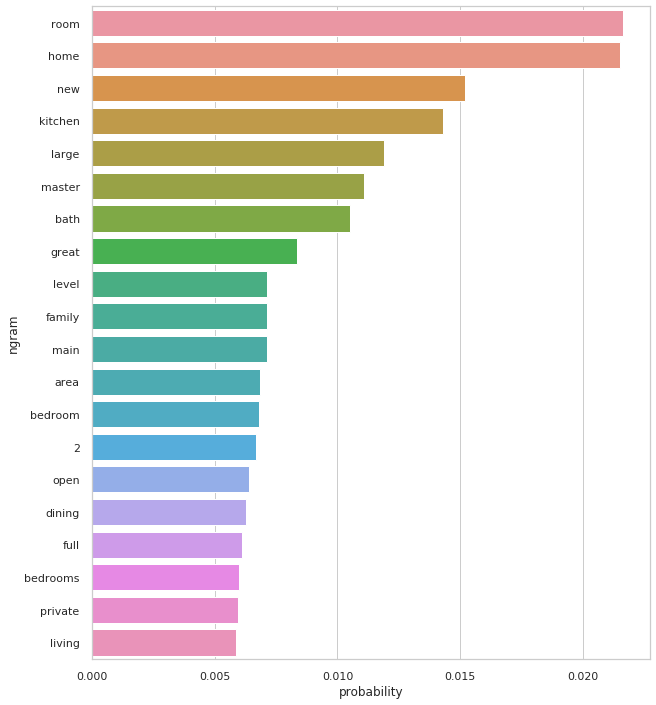

In [20]:

sns.set(style="whitegrid")

fig = plt.figure(figsize=(10,12))
ax  = fig.add_subplot(111)
sns.set_color_codes("muted")
ax = sns.barplot(x='probability', y='ngram', data=unigram_df.head(20))
ax.set_xlabel('probability')



Text(0.5, 0, 'probability')

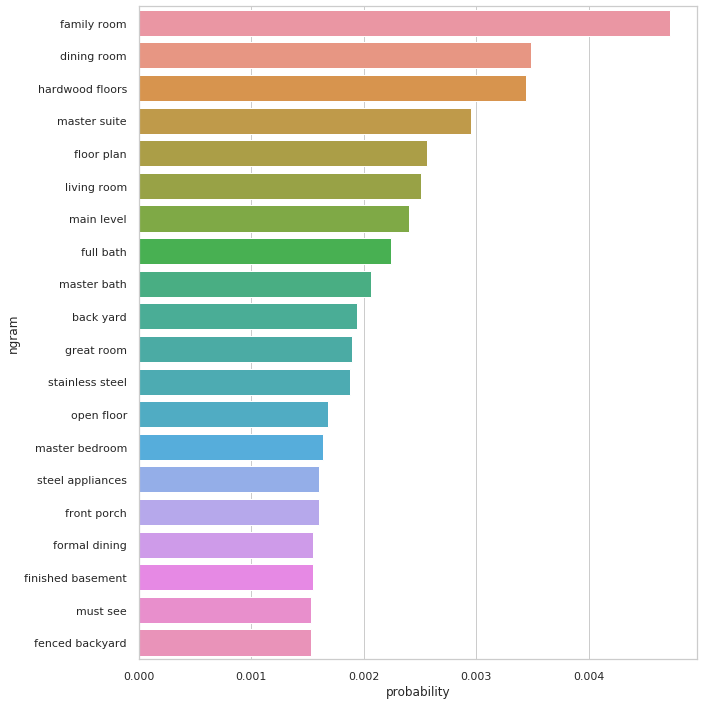

In [21]:

sns.set(style="whitegrid")

fig = plt.figure(figsize=(10,12))
ax  = fig.add_subplot(111)
sns.set_color_codes("muted")
ax = sns.barplot(x='probability', y='ngram', data=bigram_df.head(20))
ax.set_xlabel('probability')

Text(0.5, 0, 'probability')

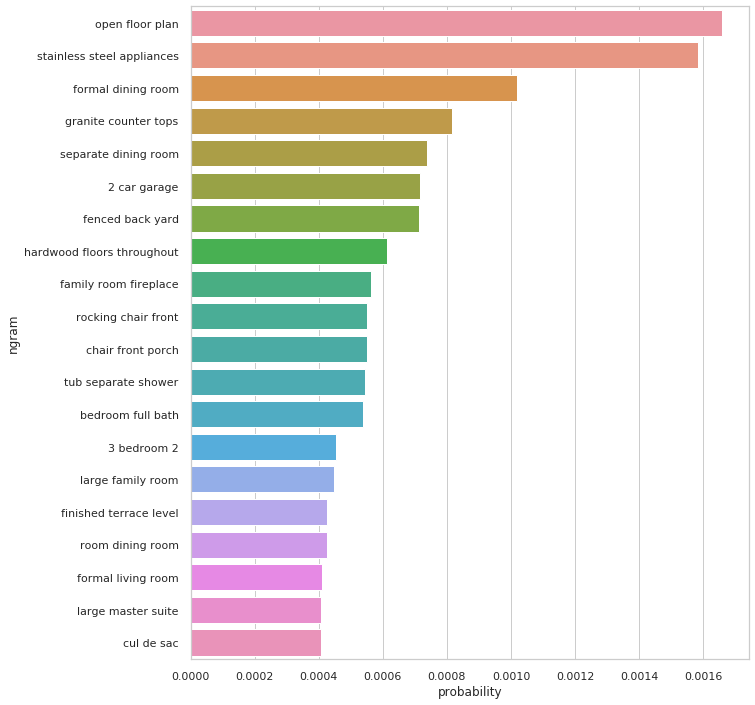

In [22]:
sns.set(style="whitegrid")

fig = plt.figure(figsize=(10,12))
ax  = fig.add_subplot(111)
sns.set_color_codes("muted")
ax = sns.barplot(x='probability', y='ngram', data=trigram_df.head(20))
ax.set_xlabel('probability')

Text(0.5, 0, 'probability')

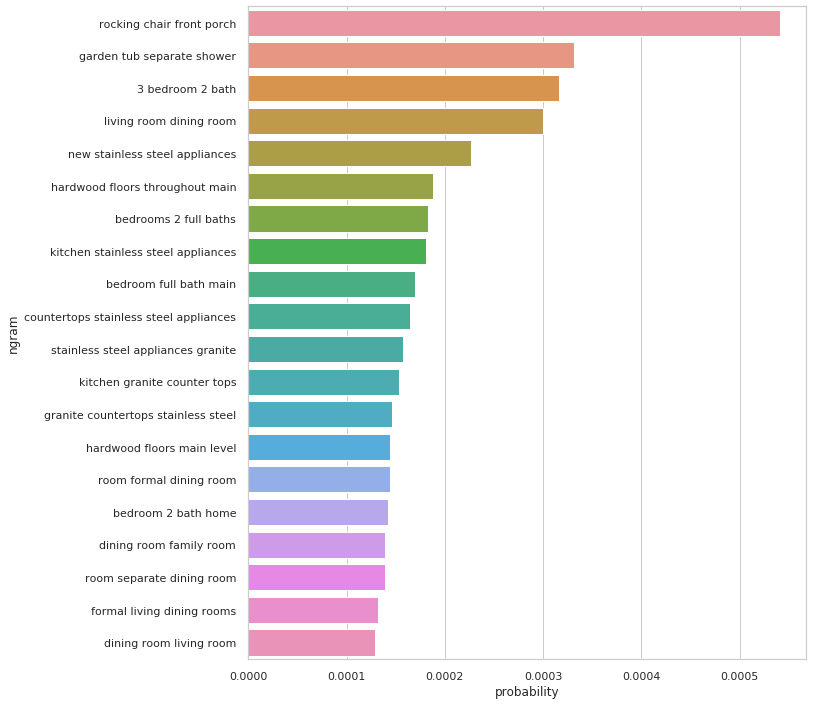

In [23]:
sns.set(style="whitegrid")

fig = plt.figure(figsize=(10,12))
ax  = fig.add_subplot(111)
sns.set_color_codes("muted")
ax = sns.barplot(x='probability', y='ngram', data=fourgram_df.head(20))
ax.set_xlabel('probability')

In [206]:
unigram_df[unigram_df['ngram'] == 'house']['probability']

83    0.002295
Name: probability, dtype: float64

In [76]:
df_sales['clean_publicremarks_nopunct'].values[0]

'welcome gorgeous basement home desired braselton community riverstone park upon entry find formal dining room office complete french doors open floor plan boasts kitchen large island  breakfast area overlooking living room open staircase 2nd floor master main master suite upstairs along walkin closets every bedroom wind day screened back porch gaze well manicured back lawn meticulously cared home lot offer waiting you riverstone park social neighborhood many activities year also access life path easy golf cart ride away favorite eateries'

In [77]:
df_sales['publicremarks'].values[0]

'Welcome to this gorgeous basement home in the desired Braselton community of Riverstone Park. Upon entry, you find the formal dining room and office complete with french doors. The open floor plan boasts a kitchen with large island & breakfast area overlooking the living room with an open staircase to the 2nd floor. Master on Main AND Master Suite upstairs along with walk-in closets in every bedroom! Wind down your day on the screened in back porch as you gaze into the well manicured back lawn. This meticulously cared for home has a lot to offer, and is waiting for you! Riverstone Park is a social neighborhood with many activities during the year. It also has access to the Life Path so you are just an easy Golf Cart Ride away from your favorite eateries!'

In [19]:
def get_n_grams_cumulative_error(df, ngram, ngram_df):
    
    for strtex in df
    
    df_ngram = ngram_analysis.get_n_grams_count(strtext,ngram)
    df_ngram = df_ngram.rename({0: 'ngram', 1: 'count'}, axis='columns')
    df_process = pd.merge(df_ngram, ngram_df, on=["ngram"])
    df_process['probability_mult'] = df_process['probability'] * df_process['count_x']
    mean_prob =  (df_process['probability_mult'].sum() / df_process['count_x'].sum())
    ngram_probs = list(df_process['probability'].quantile([.999, 0.95, 0.9, 0.75, 0.5, 0.25]))
    ngram_probs.append(mean_prob)
    return ngram_probs, df_process


In [20]:
house = 5000

In [259]:
#'index', 'listingid', 'asgpropid', 'qtr', 'tax_year', 'cbsa_div',
       'cbsa', 'state', 'Transdate', 'Transprice', 'bedrooms', 'total_value',
       'cj_living_area', 'basement', 'has_pool', 'parking', 'is_poor',
       'is_good', 'HAS_VIEW', 'has_golf', 'has_water', 'has_woods', 'has_hill',
       'fips_code', 'census_tract', 'zip', 'effective_year_built', 'story',
       'ListingPrice', 'publicremarks', 'avmValue', 'avmerror', 'rentsale',

('ListingPrice', 'publicremarks', 'avmValue', 'avmerror', 'rentsale')

In [1]:
print(df_sales['avmerror'].values[house])
print((df_sales['Transprice'].values[house]-(df_sales['avmValue'].values[house]))/df_sales['Transprice'].values[house])
print((df_sales['Transprice'].values[house]-(df_sales['ListingPrice'].values[house]))/df_sales['Transprice'].values[house])

NameError: name 'df_sales' is not defined

In [24]:
df_sales['clean_publicremarks_nopunct'].values[house]

'say hello beautiful 4 bed 3 bath home located desirable armuchee recently updated farmhouse style find white cabinets  open concept breakfast bar hall cozy master sliding barn door  en suite garden tub downstairs features large room walk closet  bath could used inlaw suite youll love entertaining guests  watching kids play privacy fenced backyard home perfect place family call dont sleep sleep it'

In [33]:
strtext = df_sales['clean_publicremarks_nopunct'].values[house]
df_ngram = ngram_analysis.get_n_grams_count(strtext,1)
df_ngram = df_ngram.rename({0: 'ngram', 1: 'count'}, axis='columns')

In [ ]:

    for strtex in df
    
    df_ngram = ngram_analysis.get_n_grams_count(strtext,ngram)
    df_ngram = df_ngram.rename({0: 'ngram', 1: 'count'}, axis='columns')
    df_process = pd.merge(df_ngram, ngram_df, on=["ngram"])
    df_process['probability_mult'] = df_process['probability'] * df_process['count_x']
    mean_prob =  (df_process['probability_mult'].sum() / df_process['count_x'].sum())
    ngram_probs = list(df_process['probability'].quantile([.999, 0.95, 0.9, 0.75, 0.5, 0.25]))
    ngram_probs.append(mean_prob)

In [30]:
ngram_probs, df_process = get_n_grams_cumulative_error(df_sales, 1, unigram_df)

In [31]:
ngram_probs

[0.02161710953041038,
 0.011219528313698875,
 0.006629171411361934,
 0.0031088502859412054,
 0.0008762343925147786,
 0.0004958018244819607,
 0.003323322023338894]

In [246]:
df_process = get_n_grams_probability(df_sales['clean_publicremarks_nopunct'].values[house], 2, bigram_df)

0.999    0.001504
0.950    0.000881
0.900    0.000503
0.750    0.000114
0.500    0.000026
0.250    0.000001
Name: probability, dtype: float64


In [174]:
ngram_analysis.get_n_grams_count(df_sales['clean_publicremarks_nopunct'].values[house],2)

,0,1
0,say hello,1
1,hello beautiful,1
2,beautiful 4,1
3,4 bed,1
4,bed 3,1
...,...,...
56,family call,1
57,call dont,1
58,dont sleep,1
59,sleep sleep,1


In [175]:
print(mean_prob)

0.03201244800450368


In [88]:
df_process

,ngram,count_x,count_y,probability,probability_mult
0,fantastic brick,1,257,7.762550e-06,7.762550e-06
1,brick home,1,22032,6.654650e-04,6.654650e-04
2,home piney,1,5,1.510224e-07,1.510224e-07
3,piney woods,1,25,7.551119e-07,7.551119e-07
4,woods inground,1,4,1.208179e-07,1.208179e-07
5,inground gunite,1,294,8.880116e-06,8.880116e-06
6,gunite pool,1,1717,5.186109e-05,5.186109e-05
7,pool 4,1,234,7.067847e-06,7.067847e-06
8,4 bed,1,3487,1.053230e-04,1.053230e-04
9,bed 35,1,635,1.917984e-05,1.917984e-05


In [34]:
df_process.probability.mean()

0.0027683377790026936

In [35]:
df_process.probability.std()

0.0043415576631314345

In [219]:
unigram_df = unigram_df.rename({0: 'ngram', 1: 'count'}, axis='columns')

In [228]:
unigram_df['count'].sum()
unigram_df['probability'] = unigram_df['count'] / unigram_df['count'].sum()

In [231]:
unigram_df['probability'].sum()

1.000000000000001

In [181]:
df_sales['publicremarks'].values[0]

'Welcome to this gorgeous basement home in the desired Braselton community of Riverstone Park. Upon entry, you find the formal dining room and office complete with french doors. The open floor plan boasts a kitchen with large island & breakfast area overlooking the living room with an open staircase to the 2nd floor. Master on Main AND Master Suite upstairs along with walk-in closets in every bedroom! Wind down your day on the screened in back porch as you gaze into the well manicured back lawn. This meticulously cared for home has a lot to offer, and is waiting for you! Riverstone Park is a social neighborhood with many activities during the year. It also has access to the Life Path so you are just an easy Golf Cart Ride away from your favorite eateries!'

In [182]:
df_ngram = ngram_analysis.get_n_grams_count(df_sales['clean_publicremarks_nopunct'].values[0],3)

In [183]:
df_ngram

,0,1
0,welcome gorgeous basement,1
1,gorgeous basement home,1
2,basement home desired,1
3,home desired braselton,1
4,desired braselton community,1
...,...,...
73,easy golf cart,1
74,golf cart ride,1
75,cart ride away,1
76,ride away favorite,1


In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

In [94]:
matrix, unigram = ngram_analysis.get_imp(bow,mf=5000,ngram=1)

/home/cdsw/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass input=['gorgeous basement desired braselton community riverstone park. entry, find formal dining room office complete french doors. open floor plan boasts kitchen large island & breakfast area overlooking living room open staircase 2nd floor. master main master suite upstairs walk-in closets bedroom! wind day screened porch gaze manicured lawn. meticulously cared lot offer, waiting you! riverstone park social neighborhood activities year. access life path easy golf cart ride favorite eateries!', 'location location location!!!! steps & downtown lagrange offer! renovated perfection historic sought family oriented ridge crest community. spacious master main floor plan w beautiful hardwood flooring, updated gourmet kitchen w cabinetry & stone counter tops & high stainless appliance package chef family,adjoining formal dinning room ideal large family gatherings, cozy secondary den w coffered ce